Давыдов ПИм-231

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # Класс преобразователь
from sklearn.metrics import r2_score, mean_squared_error

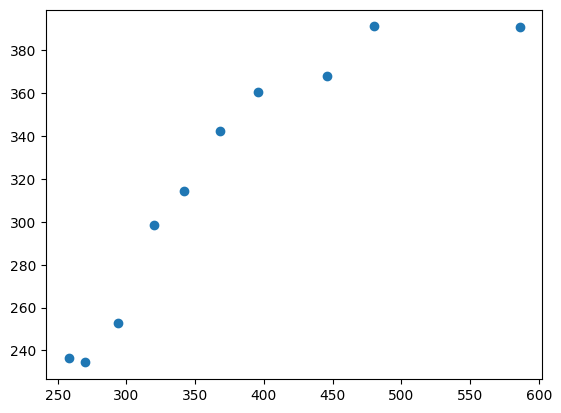

In [ ]:
# Моделируем данные
X = np.array([258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0])[:, np.newaxis]
y = np.array([236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8])
plt.scatter(X, y)

In [ ]:
lr = LinearRegression() # Линейная регрессия
lr.fit(X, y) # Обучим линейную регрессию

LinearRegression()

In [ ]:
X_ = np.arange(250, 600, 35)[:, np.newaxis] # Точки для предсказания
print(X_)
y_lr = lr.predict(X_) # Предсказываем y для линейной регрессии

[[250]
 [285]
 [320]
 [355]
 [390]
 [425]
 [460]
 [495]
 [530]
 [565]]


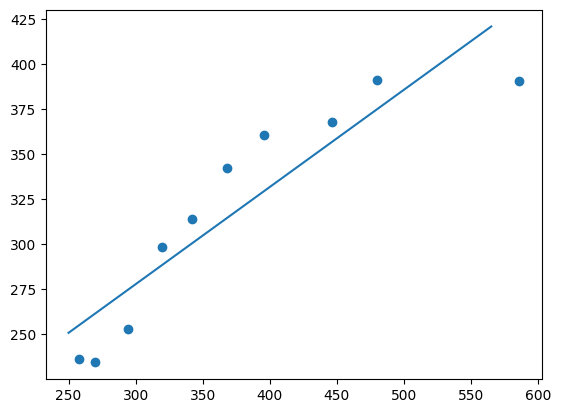

In [ ]:
plt.scatter(X, y)
plt.plot(X_, y_lr)

In [ ]:
pr = LinearRegression() # Полиномиальная регрессия

In [ ]:
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)       # Преобразуем данные

In [ ]:
pr.fit(X_quad, y) # Обучаем полиномиальную регрессию

LinearRegression()

In [ ]:
y_pr = pr.predict(quadratic.fit_transform(X_)) # Предсказываем y для полиномиальной регрессии

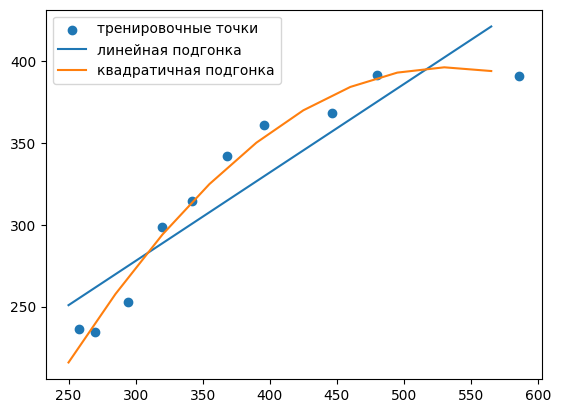

In [ ]:
plt.scatter(X, y, label = 'тренировочные точки')
plt.plot(X_, y_lr, label = 'линейная подгонка')
plt.plot(X_, y_pr, label = 'квадратичная подгонка')
plt.legend(loc='upper left')
plt.show()

Задание 1. Оцените полученные модели с помощью коэффициента детерминации и MSE.

Что можно сказать о качестве моделей?

In [ ]:
# Оцениваем линейную регрессию
r2_lr = r2_score(y, y_lr)
mse_lr = mean_squared_error(y, y_lr)

# Оцениваем полиномиальную регрессию
r2_pr = r2_score(y, y_pr)
mse_pr = mean_squared_error(y, y_pr)

print(f'Коэффициент детерминации для линейной регрессии: {r2_lr:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для линейной регрессии: {mse_lr:.4f}')

print(f'Коэффициент детерминации для полиномиальной регрессии: {r2_pr:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для полиномиальной регрессии: {mse_pr:.4f}')

Коэффициент детерминации для линейной регрессии: 0.8739
Среднеквадратичная ошибка (MSE) для линейной регрессии: 427.0465
Коэффициент детерминации для полиномиальной регрессии: 0.8050
Среднеквадратичная ошибка (MSE) для полиномиальной регрессии: 660.1287


Задание 2. Постройте полиномиальную модель, описывающую следующую зависимость:

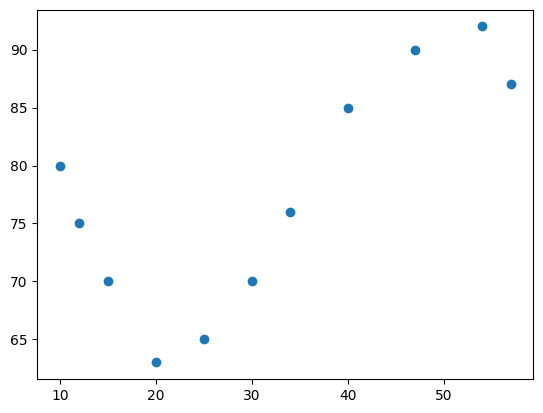

In [ ]:
x = np.array([10, 12, 15, 20, 25, 30, 34, 40, 47, 54, 57])[:, np.newaxis]
y = np.array([80, 75, 70, 63, 65, 70, 76, 85, 90, 92, 87])

plt.scatter(x, y) # Изображаем точки на графике
plt.show()

Задание 3. Какую степень полинома вы использовали?

Попробуйте изменить степень полинома, например, на 2, 5, 15? Как меняется результат?

In [ ]:
cubic = PolynomialFeatures(degree=3)
X_cubic = cubic.fit_transform(x)

five = PolynomialFeatures(degree=5)
X_five = five.fit_transform(x)

ten = PolynomialFeatures(degree=10)
X_ten = ten.fit_transform(x)

fifteen = PolynomialFeatures(degree=15)
X_fifteen = fifteen.fit_transform(x)

In [ ]:
pr3 = LinearRegression()
pr5 = LinearRegression()
pr10 = LinearRegression()
pr15 = LinearRegression()
pr3.fit(X_cubic, y)
pr5.fit(X_five, y)
pr10.fit(X_ten, y)
pr15.fit(X_fifteen, y)

LinearRegression()

In [ ]:
x_fit = np.arange(10, 60, 1)[:, np.newaxis]
X_fit_cubic = cubic.fit_transform(x_fit)
X_fit_five = five.fit_transform(x_fit)
X_fit_ten = ten.fit_transform(x_fit)
X_fit_fifteen = fifteen.fit_transform(x_fit)

In [ ]:
y_pred_pr3 = pr3.predict(X_fit_cubic)
y_pred_pr5 = pr5.predict(X_fit_five)
y_pred_pr10 = pr10.predict(X_fit_ten)
y_pred_pr15 = pr15.predict(X_fit_fifteen)

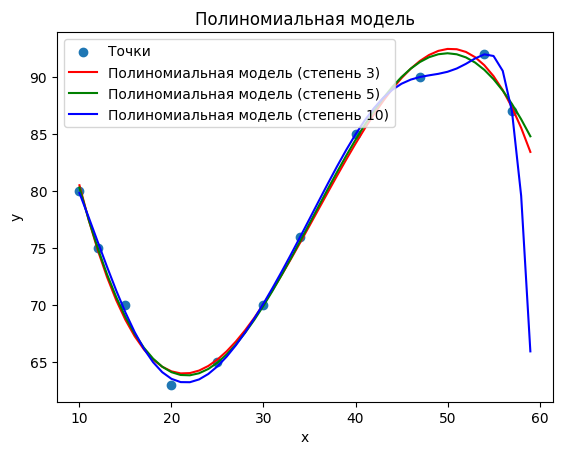

In [ ]:
plt.scatter(x, y, label='Точки')
plt.plot(x_fit, y_pred_pr3, label='Полиномиальная модель (степень 3)', color='red')
plt.plot(x_fit, y_pred_pr5, label='Полиномиальная модель (степень 5)', color='green')
plt.plot(x_fit, y_pred_pr10, label='Полиномиальная модель (степень 10)', color='blue')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная модель')
plt.show()

3 и 5 степени показывают себя нормально, тем временем 10 начинает уходить ниже.

Text(0.5, 1.0, 'Полиномиальная модель (степень 15)')

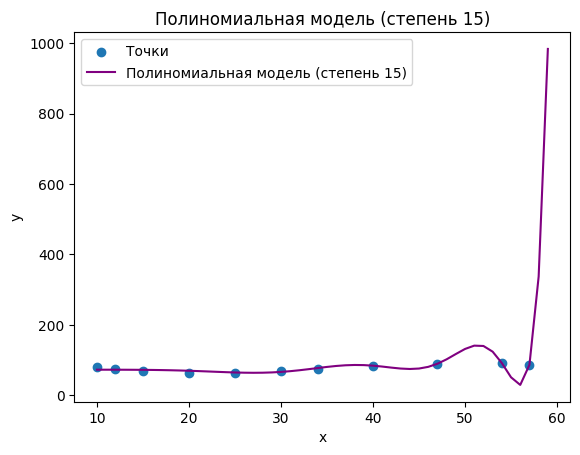

In [ ]:
plt.scatter(x, y, label='Точки')
plt.plot(x_fit, y_pred_pr15, label='Полиномиальная модель (степень 15)', color='purple')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Полиномиальная модель (степень 15)')

График с 15-ой степенью начинает вилять и уходит вверх.

In [ ]:
r2_pr_3 = r2_score(x_fit, y_pred_pr3)
mse_pr_3 = mean_squared_error(x_fit, y_pred_pr3)

r2_pr_5 = r2_score(x_fit, y_pred_pr5)
mse_pr_5 = mean_squared_error(x_fit, y_pred_pr5)

r2_pr_10 = r2_score(x_fit, y_pred_pr10)
mse_pr_10 = mean_squared_error(x_fit, y_pred_pr10)

r2_pr_15 = r2_score(x_fit, y_pred_pr15)
mse_pr_15 = mean_squared_error(x_fit, y_pred_pr15)

print(f'Коэффициент детерминации для полиномиальной регрессии, степень 3: {r2_pr_3:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 3: {mse_pr_3:.4f}')
print(f'Коэффициент детерминации для полиномиальной регрессии, степень 5: {r2_pr_5:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 5: {mse_pr_5:.4f}')
print(f'Коэффициент детерминации для полиномиальной регрессии, степень 10: {r2_pr_10:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 10: {mse_pr_10:.4f}')
print(f'Коэффициент детерминации для полиномиальной регрессии, степень 15: {r2_pr_15:.4f}')
print(f'Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 15: {mse_pr_15:.4f}')

Коэффициент детерминации для полиномиальной регрессии, степень 3: -8.5131
Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 3: 1981.1049
Коэффициент детерминации для полиномиальной регрессии, степень 5: -8.5216
Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 5: 1982.8827
Коэффициент детерминации для полиномиальной регрессии, степень 10: -8.4128
Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 10: 1960.2225
Коэффициент детерминации для полиномиальной регрессии, степень 15: -100.1483
Среднеквадратичная ошибка (MSE) для полиномиальной регрессии, степень 15: 21064.1437


In [ ]:
pr3.score(x, y)

ValueError: ignored

score() почему-то не работает, перепробовал все данные